# Comparing wigner functions 

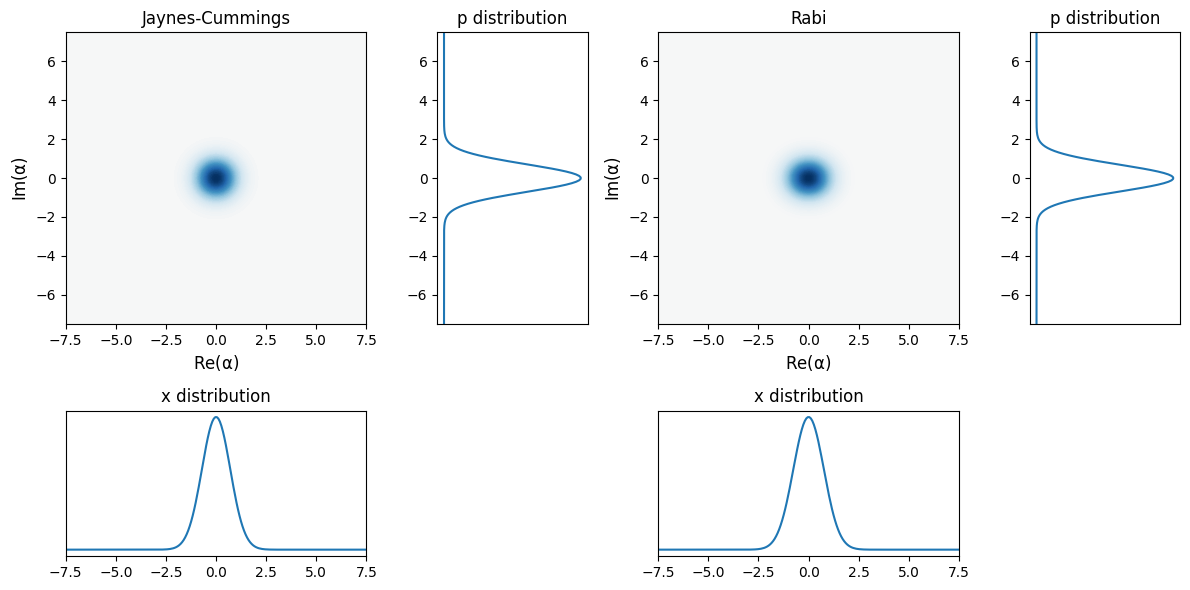

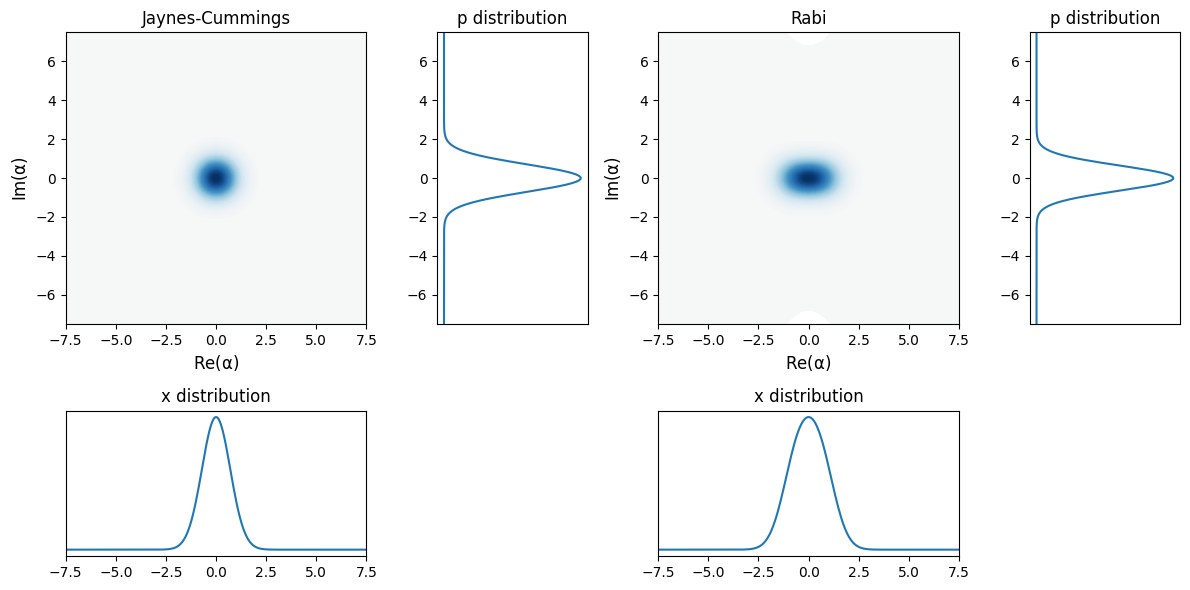

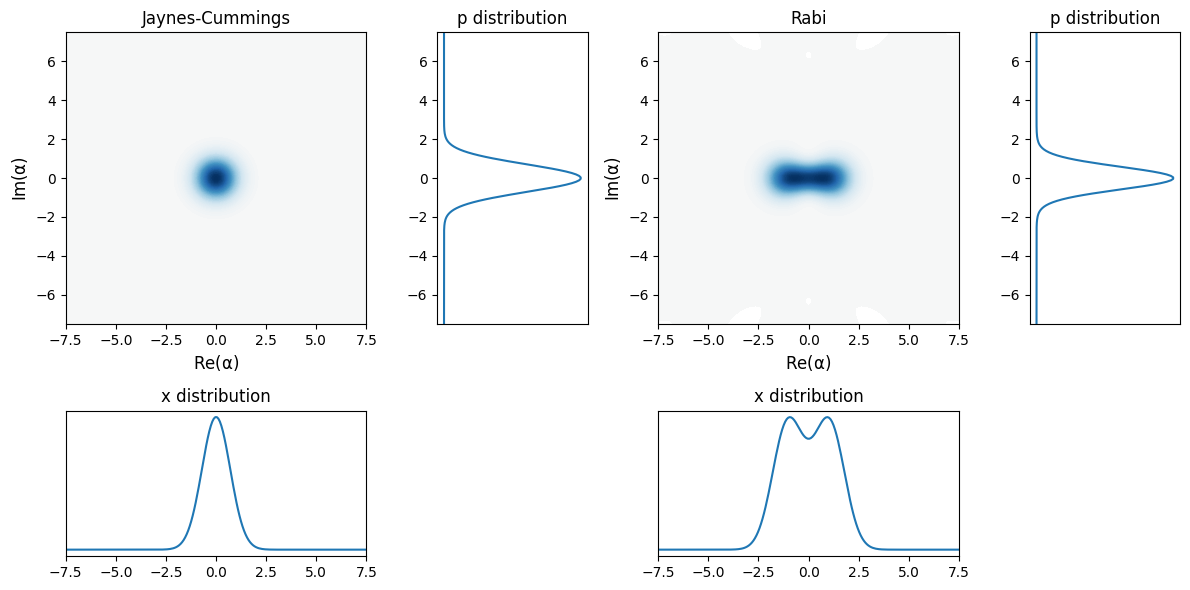

In [ ]:
#import libraries
from qutip import *
from qutip.wigner import wigner
from qutip.visualization import plot_wigner
from matplotlib import transforms
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.transforms as transforms

#Hamiltonians

def HamiltonianJaynesCummings(g : float, wr : float, wt : float, N : int) -> Qobj:
    a = destroy(N)
    return tensor(a.dag()*a, qeye(2))*wr + 0.5*wr - 0.5*wt*tensor(qeye(N), sigmaz()) + g*(tensor(a.dag(),sigmap()) + tensor(a,sigmam()))

def HamiltonianRabi(g : float, wr : float, wt : float, N : int) -> Qobj:
    a = destroy(N)
    return tensor(a.dag()*a, qeye(2))*wr + 0.5*wr - 0.5*wt*tensor(qeye(N), sigmaz()) + g*tensor(a.dag() + a, qeye(2))*tensor(qeye(N), sigmap() + sigmam())



#wigner plot function
def plot_wigner_psi_phi(psi, fig, alpha_max=7.5):
    fig.clf()  # clear figure
    
    widths = [6,3]
    heights = [6,3]
    spec = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
    
    x = np.linspace(-alpha_max, alpha_max, 200)
    wig = wigner(psi, x, x)
    
    psi_x = np.sum(wig, axis=0)
    psi_p = np.sum(wig, axis=1)
    
    # --- Wigner plot ---
    ax_wig = fig.add_subplot(spec[0,0])
    plot_wigner(psi, x, x, fig=fig, ax=ax_wig)
    ax_wig.set_title('Wigner function')
    
    # --- p distribution ---
    ax_p = fig.add_subplot(spec[0,1])
    base = ax_p.transData
    rot = transforms.Affine2D().rotate_deg(90)
    ax_p.plot(x, -psi_p, transform=rot + base)
    ax_p.set_xticks([])
    ax_p.set_ylim(-alpha_max, alpha_max)
    ax_p.set_title('p distribution')
    
    # --- x distribution ---
    ax_x = fig.add_subplot(spec[1,0])
    ax_x.plot(x, psi_x)
    ax_x.set_yticks([])
    ax_x.set_xlim(-alpha_max, alpha_max)
    ax_x.set_title('x distribution')
    
    fig.tight_layout()
    return fig

#wigner plot with marginals side by side
def plot_wigner_psi_phi_axes(psi, fig, grid_position, alpha_max=7.5, title=""):
    widths = [6,3]
    heights = [6,3]
    spec = fig.add_gridspec(ncols=4, nrows=2, width_ratios=[6,3,6,3], height_ratios=heights)
    
    x = np.linspace(-alpha_max, alpha_max, 200)
    wig = wigner(psi, x, x)
    psi_x = np.sum(wig, axis=0)
    psi_p = np.sum(wig, axis=1)
    
    # Wigner
    ax_wig = fig.add_subplot(spec[0, grid_position])
    plot_wigner(psi, x, x, fig=fig, ax=ax_wig)
    ax_wig.set_title(title)
    
    # p-marginal
    ax_p = fig.add_subplot(spec[0, grid_position+1])
    base = ax_p.transData
    rot = transforms.Affine2D().rotate_deg(90)
    ax_p.plot(x, -psi_p, transform=rot + base)
    ax_p.set_xticks([])
    ax_p.set_ylim(-alpha_max, alpha_max)
    ax_p.set_title('p distribution')
    
    # x-marginal
    ax_x = fig.add_subplot(spec[1, grid_position])
    ax_x.plot(x, psi_x)
    ax_x.set_yticks([])
    ax_x.set_xlim(-alpha_max, alpha_max)
    ax_x.set_title('x distribution')
    
    return fig

#  Parameters 
N = 5
wr = 1.0
wt = 1.0
g1 = 0.3
g2 = 0.6
g3 = 0.9

# Ground states 
H_JC = HamiltonianJaynesCummings(g1, wr, wt, N)
H_JC2 = HamiltonianJaynesCummings(g2, wr, wt, N)
H_JC3 = HamiltonianJaynesCummings(g3, wr, wt, N)

psi_jc = H_JC.groundstate()[1]
rho_jc = ket2dm(psi_jc).ptrace(0)
psi_jc2 = H_JC2.groundstate()[1]
rho_jc2 = ket2dm(psi_jc2).ptrace(0)
psi_jc3 = H_JC3.groundstate()[1]
rho_jc3 = ket2dm(psi_jc3).ptrace(0)

H_Rabi = HamiltonianRabi(g1, wr, wt, N)
H_Rabi2 = HamiltonianRabi(g2, wr, wt, N)
H_Rabi3 = HamiltonianRabi(g3, wr, wt, N)

psi_rabi = H_Rabi.groundstate()[1]
rho_rabi = ket2dm(psi_rabi).ptrace(0)
psi_rabi2 = H_Rabi2.groundstate()[1]
rho_rabi2 = ket2dm(psi_rabi2).ptrace(0)
psi_rabi3 = H_Rabi3.groundstate()[1]
rho_rabi3 = ket2dm(psi_rabi3).ptrace(0)


# Plots

#plot for g=0.3
fig = plt.figure(figsize=(12,6))
plot_wigner_psi_phi_axes(rho_jc, fig, grid_position=0, title="Jaynes-Cummings")
plot_wigner_psi_phi_axes(rho_rabi, fig, grid_position=2, title="Rabi")
plt.tight_layout()
plt.show()

#plot for g=0.6
fig = plt.figure(figsize=(12,6))
plot_wigner_psi_phi_axes(rho_jc2, fig, grid_position=0, title="Jaynes-Cummings")
plot_wigner_psi_phi_axes(rho_rabi2, fig, grid_position=2, title="Rabi")
plt.tight_layout()
plt.show()

#plot for g=0.9
fig = plt.figure(figsize=(12,6))
plot_wigner_psi_phi_axes(rho_jc3, fig, grid_position=0, title="Jaynes-Cummings")
plot_wigner_psi_phi_axes(rho_rabi3, fig, grid_position=2, title="Rabi")
plt.tight_layout()
plt.show()


#animation

fig = plt.figure(figsize=(12,6))
g_values = np.linspace(0.0, 4.0, 30)

def animate(i):
    fig.clf()
    g = g_values[i]
    H_JC = HamiltonianJaynesCummings(g, wr, wt, N)
    psi_jc = H_JC.groundstate()[1]
    rho_jc = ket2dm(psi_jc).ptrace(0)
    H_Rabi = HamiltonianRabi(g, wr, wt, N)
    psi_rabi = H_Rabi.groundstate()[1]
    rho_rabi = ket2dm(psi_rabi).ptrace(0)
    plot_wigner_psi_phi_axes(rho_jc, fig, grid_position=0, title=f"JC g={g:.2f}")
    plot_wigner_psi_phi_axes(rho_rabi, fig, grid_position=2, title=f"Rabi g={g:.2f}")
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.3, wspace=0.4)
    return fig,

ani = FuncAnimation(fig, animate, frames=len(g_values), interval=500, blit=False)
plt.close(fig)
display(HTML(ani.to_jshtml()))